In [2]:
import ezkl
import torch
from torch import nn
import json
import os
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math

In [3]:
%run -i ../../bench.py

In [4]:
data_50_path = os.path.join('data_50.json')
data_100_path = os.path.join('data_100.json')
data_300_path = os.path.join('data_300.json')
data_600_path = os.path.join('data_600.json')
data_1000_path = os.path.join('data_1000.json')

In [4]:
def gen_param_func(data_tensor_array):
    # for 1 value, just have 1 element in tensor array
    data_tensor = data_tensor_array[0]
    return [torch.mean(data_tensor)]

def model_func(param):
    class verifier_model(nn.Module):
        def __init__(self):
            super(verifier_model, self).__init__()
            self.w = nn.Parameter(data = param[0], requires_grad = False)

        def forward(self,X):
            # here is witness approach
            return (torch.abs(torch.sum(X)-X.size()[1]*(self.w))<=torch.abs(0.01*X.size()[1]*self.w), self.w)
    return verifier_model

sm_time =[0,0,0,0,0]
med_time = [0,0,0,0,0]
lar_time = [0,0,0,0,0]

Summary of Proving Time (1% accuracy)

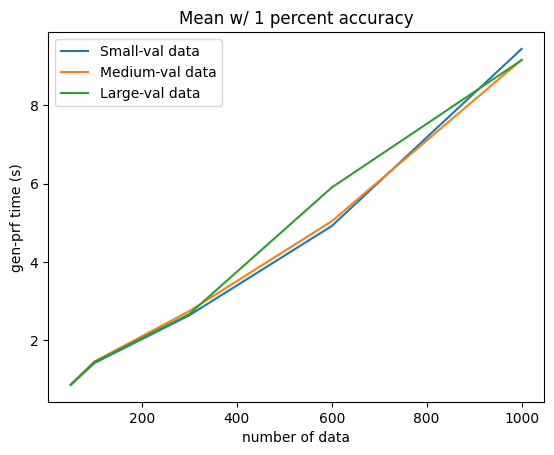

In [21]:
# RUN this cell LAST
# Hence calibrate scale accordingly to compres the circuit size as long as the answer still within 1 percent
import matplotlib.pyplot as plt
data_number = [50, 100, 300, 600, 1000]
# sm_time = [0.7684879302978516,1.3166420459747314,2.6340391635894775, 4.918079853057861 , 8.896933794021606]
plt.title("Mean w/ 1 percent accuracy")
plt.xlabel("number of data")
plt.ylabel("gen-prf time (s)")
plt.plot(data_number, sm_time, label = 'Small-val data')

# med_time = [0.7951033115386963, 1.3345720767974854, 2.5550217628479004, 4.829335927963257, 9.212452173233032]
plt.plot(data_number, med_time, label = 'Medium-val data')

# lar_time = [1.2746598720550537, 2.2985689640045166, 4.399665117263794, 8.803163051605225, 17.28679895401001]
plt.plot(data_number, lar_time, label = 'Large-val data')


plt.legend()


=============================================================================================================

Small-Valued Data: value 0-1, 3 decimals on 50, 100, 300, 600, 1000 data

In [5]:
sm_time[0]= bench_one(data_50_path, ['small'],model_func,gen_param_func, "50 small values","default", 12, "resources", )

spawning module 0
spawning module 2


=====================================  50 small values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-270, 0], 'logrows': 12, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 110, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-270, 0]

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.8568980693817139
Theory result:  tensor(0.5284, dtype=torch.float64)
Our result:  [0.529296875]


In [6]:
sm_time[1]= bench_one(data_100_path,['small'], model_func,gen_param_func, "100 small values","default", 13,"resources")

spawning module 0
spawning module 2


=====================================  100 small values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-538, 0], 'logrows': 13, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 210, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-538, 0

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.41274094581604
Theory result:  tensor(0.5274, dtype=torch.float64)
Our result:  [0.52734375]


In [7]:
sm_time[2]= bench_one(data_300_path,['small'], model_func,gen_param_func, "300 small values","default",14,  "resources")

spawning module 0
spawning module 2


=====================================  300 small values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-1534, 0], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 610, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-153

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  2.6337289810180664
Theory result:  tensor(0.5015, dtype=torch.float64)
Our result:  [0.501953125]


In [8]:
sm_time[3] = bench_one(data_600_path, ['small'],model_func,gen_param_func, "600 small values","default", 15,"resources")

=====================================  600 small values  =====================================


spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-3032, 0], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 1210, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-3032, 0], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  4.9154040813446045
Theory result:  tensor(0.4951, dtype=torch.float64)
Our result:  [0.49609375]


In [9]:
sm_time[4] = bench_one(data_1000_path, ['small'],model_func,gen_param_func, "1000 small values","default", 16,"resources")

=====================================  1000 small values  =====================================


spawning module 0
spawning module 2


og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-4998, 0], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 2010, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 9], 'model_input_scales': [9], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 9, 'param_scale': 9, 'scale_rebase_multiplier': 10, 'lookup_range': [-4998, 0], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  9.443225860595703
Theory result:  tensor(0.4881, dtype=torch.float64)
Our result:  [0.48828125]


=============================================================================================================

Medium data: value 1-100, 1 decimal on 50, 100, 300, 600, 1000 data

In [10]:
# can use "default" which will set to scale 8, but overkill, we just want 1% accuracy
med_time[0] = bench_one(data_50_path,['medium'], model_func,gen_param_func, "50 medium values",[3],12,  "resources")

spawning module 0
spawning module 2


=====================================  50 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-466, 0], 'logrows': 12, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 110, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-466, 0

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.8623270988464355
Theory result:  tensor(58.6840, dtype=torch.float64)
Our result:  [58.625]


In [11]:
med_time[1] = bench_one(data_100_path,['medium'], model_func,gen_param_func, "100 medium values",[3],13, "resources")

spawning module 0
spawning module 2


=====================================  100 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-856, 0], 'logrows': 13, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 210, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-856, 

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.451150894165039
Theory result:  tensor(53.9470, dtype=torch.float64)
Our result:  [54.0]


In [12]:
med_time[2]= bench_one(data_300_path,['medium'], model_func,gen_param_func, "300 medium values",[3],14, "resources")

spawning module 0
spawning module 2


=====================================  300 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-2498, 0], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 610, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-24

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  2.7418019771575928
Theory result:  tensor(52.5313, dtype=torch.float64)
Our result:  [52.5]


In [13]:
med_time[3] = bench_one(data_600_path,['medium'], model_func,gen_param_func, "600 medium values",[3],15, "resources")

spawning module 0
spawning module 2


=====================================  600 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-4944, 0], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 1210, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-4

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  5.0383079051971436
Theory result:  tensor(51.6755, dtype=torch.float64)
Our result:  [51.625]


In [14]:
med_time[4] = bench_one(data_1000_path,['medium'], model_func,gen_param_func, "1000 medium values",[3],16, "resources")

=====================================  1000 medium values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-8296, 0], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 2010, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 3], 'model_input_scales': [3], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 3, 'param_scale': 3, 'scale_rebase_multiplier': 10, 'lookup_range': [-

spawning module 0
spawning module 2
spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  9.166342735290527
Theory result:  tensor(52.0456, dtype=torch.float64)
Our result:  [52.0]


=============================================================================================================

Large-valued data: value 100-1000, 0 decimal on 50, 100, 300, 600, 1000 data

In [15]:
lar_time[0] = bench_one(data_50_path, ['large'],model_func,gen_param_func, "50 large values",[0],12, "resources")

spawning module 0
spawning module 2


=====================================  50 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-560, 0], 'logrows': 12, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 3936, 'total_assignments': 110, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [3936, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-560, 0]

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.8607187271118164
Theory result:  tensor(560.5200, dtype=torch.float64)
Our result:  [561.0]


In [17]:
lar_time[1] = bench_one(data_100_path,['large'], model_func,gen_param_func, "100 large values",[0],13, "resources")

spawning module 0
spawning module 2


=====================================  100 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-1112, 0], 'logrows': 13, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 6560, 'total_assignments': 210, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [6560, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-1112,

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.4374589920043945
Theory result:  tensor(556.3400, dtype=torch.float64)
Our result:  [556.0]


In [18]:
lar_time[2] = bench_one(data_300_path,['large'], model_func,gen_param_func, "300 large values",[0],14, "resources")

spawning module 0
spawning module 2


=====================================  300 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-3148, 0], 'logrows': 14, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 14432, 'total_assignments': 610, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [14432, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-314

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  2.6659650802612305
Theory result:  tensor(524.5433, dtype=torch.float64)
Our result:  [525.0]


In [19]:
lar_time[3] = bench_one(data_600_path,['large'], model_func,gen_param_func, "600 large values",[0], 15,"resources")

spawning module 0
spawning module 2


=====================================  600 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-6418, 0], 'logrows': 15, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 26240, 'total_assignments': 1210, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [26240, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-64

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  5.900702953338623
Theory result:  tensor(534.8433, dtype=torch.float64)
Our result:  [535.0]


In [20]:
lar_time[4] = bench_one(data_1000_path,['large'], model_func,gen_param_func, "1000 large values",[0], 16,"resources")

spawning module 0
spawning module 2


=====================================  1000 large values  =====================================
og setting:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-10870, 0], 'logrows': 16, 'num_inner_cols': 2, 'variables': [['batch_size', 1]], 'input_visibility': {'Hashed': {'hash_is_public': True, 'outlets': []}}, 'output_visibility': 'Public', 'param_visibility': 'Private'}, 'num_rows': 45920, 'total_assignments': 2010, 'total_const_size': 4, 'model_instance_shapes': [[1], [1]], 'model_output_scales': [0, 0], 'model_input_scales': [0], 'module_sizes': {'kzg': [], 'poseidon': [45920, [1]], 'elgamal': [0, [0]]}, 'required_lookups': ['Abs', {'GreaterThan': {'a': 0.0}}], 'check_mode': 'UNSAFE', 'version': '7.0.0', 'num_blinding_factors': None}
logrow cal settings:  {'run_args': {'tolerance': {'val': 0.0, 'scale': 1.0}, 'input_scale': 0, 'param_scale': 0, 'scale_rebase_multiplier': 10, 'lookup_range': [-

spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  9.155535221099854
Theory result:  tensor(543.4840, dtype=torch.float64)
Our result:  [543.0]
